In [203]:
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
import numpy as np

In [204]:
DATA_PATH = r'/kaggle/input/titanic/'
TRAIN_PATH = DATA_PATH + r'train.csv'
TEST_PATH  = DATA_PATH + r'test.csv'
EXAMPLE_PATH = DATA_PATH + 'gender_submission.csv'

# 1. Data Preparation

In [205]:
train_df = pd.read_csv(TRAIN_PATH)
test_df  = pd.read_csv(TEST_PATH)
example_df = pd.read_csv(EXAMPLE_PATH)

In [206]:
example_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [207]:
train_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2. EDA

## 2.1. General information

In [208]:
def extract_general_description(\
    df: pd.DataFrame
) -> None:
    print('----------- GENERAL DESCRIPTION -----------')
    print(f'Number of columns: {df.shape[1]}') 
    print(f'Number of samples: {df.shape[0]}') 

    column_description ={
        'names': df.columns,
        'datatype': df.dtypes,
        'number_of_null_value': df.isnull().sum(),
        'null_rate': (df.isnull().sum() / df.shape[0]) * 100,
        'number_of_distinct_value': df.nunique()
    }

    used_datatype = set(column_description['datatype'])
    print(f'Types of datatype: {used_datatype}')
    return (pd.DataFrame(column_description))

In [209]:
extract_general_description(
    train_df
)

----------- GENERAL DESCRIPTION -----------
Number of columns: 12
Number of samples: 891
Types of datatype: {dtype('float64'), dtype('O'), dtype('int64')}


,names,datatype,number_of_null_value,null_rate,number_of_distinct_value
PassengerId,PassengerId,int64,0,0.000000,891
Survived,Survived,int64,0,0.000000,2
Pclass,Pclass,int64,0,0.000000,3
Name,Name,object,0,0.000000,891
Sex,Sex,object,0,0.000000,2
Age,Age,float64,177,19.865320,88
SibSp,SibSp,int64,0,0.000000,7
Parch,Parch,int64,0,0.000000,7
Ticket,Ticket,object,0,0.000000,681
Fare,Fare,float64,0,0.000000,248


In [210]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 2.2. Univariate analysis

### 2.2.1. Utils for distribution

In [211]:
def visualize_distribution(
    df: pd.DataFrame,
    column_name: str,
    is_discrete: bool
) -> None:
    plt.figure(figsize=(10, 6))

    if is_discrete:
        counts = df[column_name].value_counts().sort_index()
        plt.bar(x=counts.index.astype(str), height=counts.values, color='skyblue')
        
        plt.title(f'Distribution of {column_name} (Discrete)', fontsize=14)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45, ha='right')
    else:
        plt.hist(df[column_name].dropna(), bins=20, edgecolor='black', alpha=0.7, color='lightcoral')
        plt.title(f'Distribution of {column_name} (Continuous)', fontsize=14)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation='vertical')
        
    plt.xlabel(column_name, fontsize=12)
    plt.tight_layout()
    plt.show()

    return None

### 2.2.2. Univariate Analysis

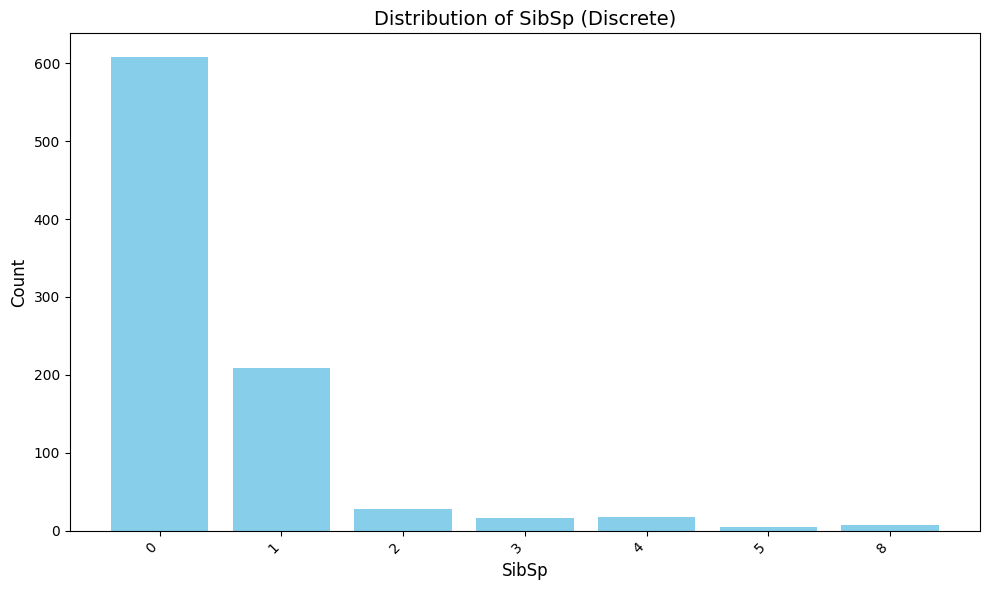

In [212]:
visualize_distribution(
    train_df,
    'SibSp',
    True
)

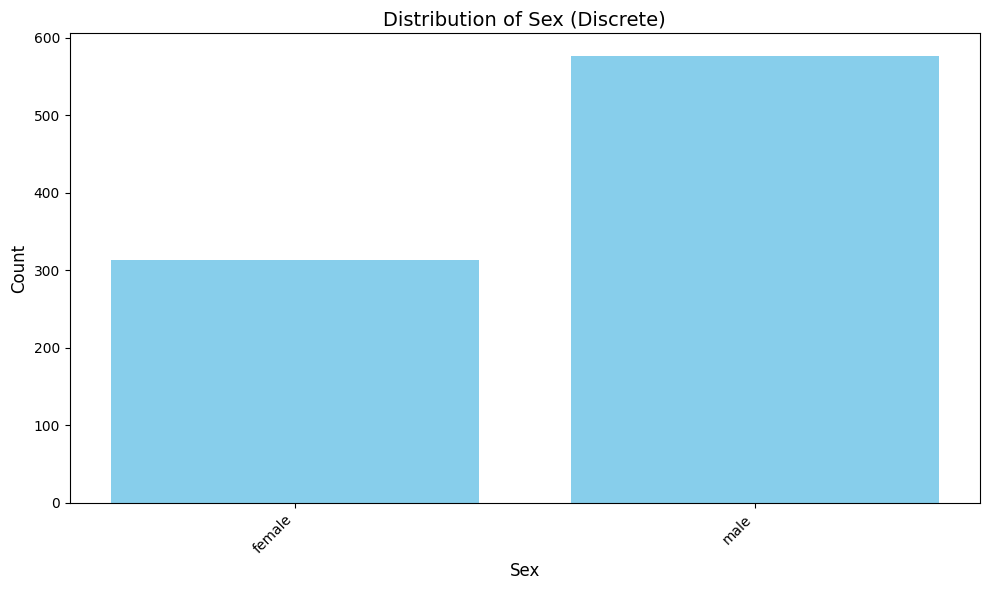

In [213]:
visualize_distribution(
    train_df,
    'Sex',
    True
)

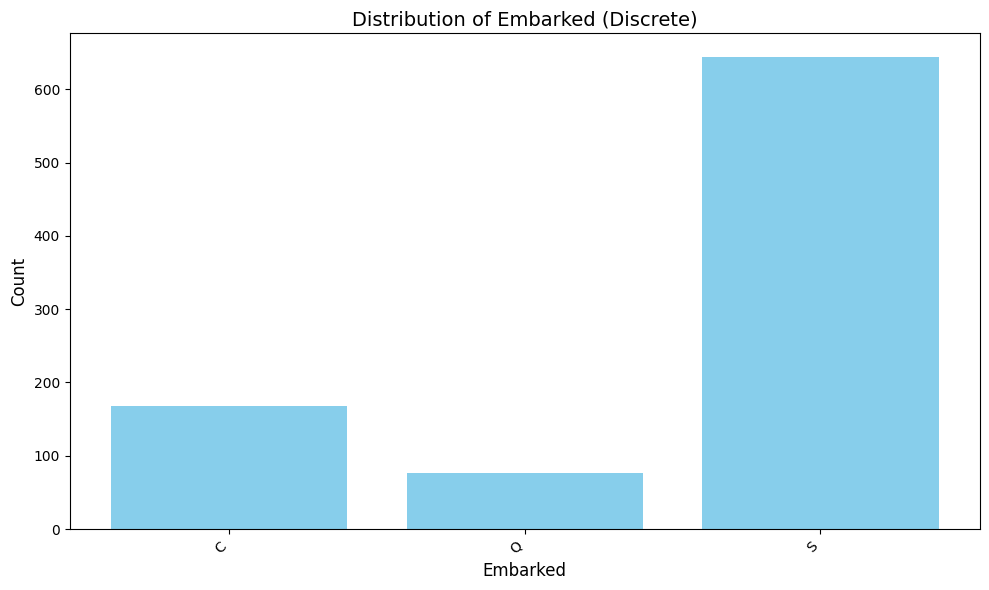

In [214]:
visualize_distribution(
    train_df,
    'Embarked',
    True
)

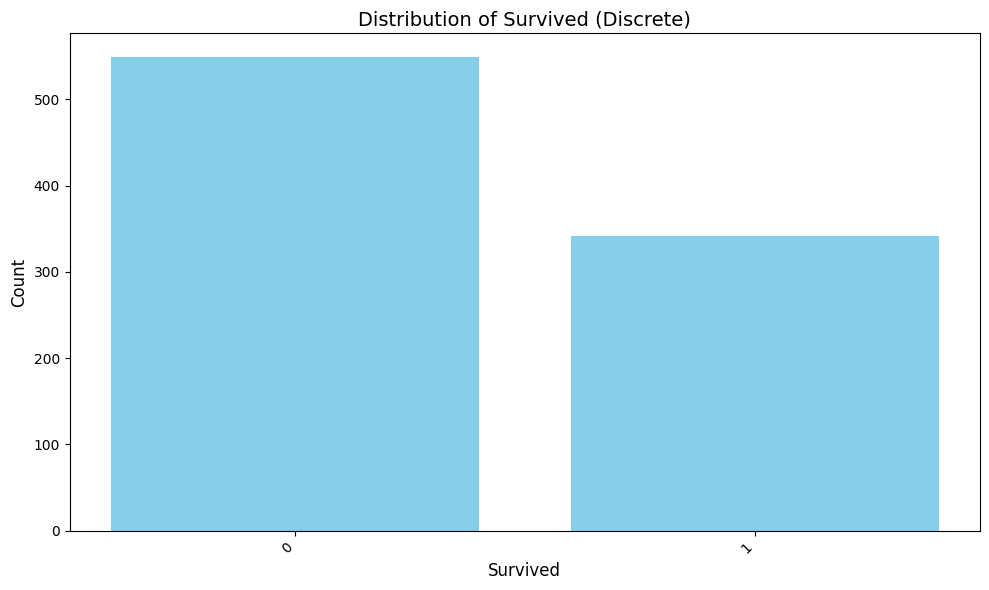

In [215]:
visualize_distribution(
    train_df,
    'Survived',
    True
)

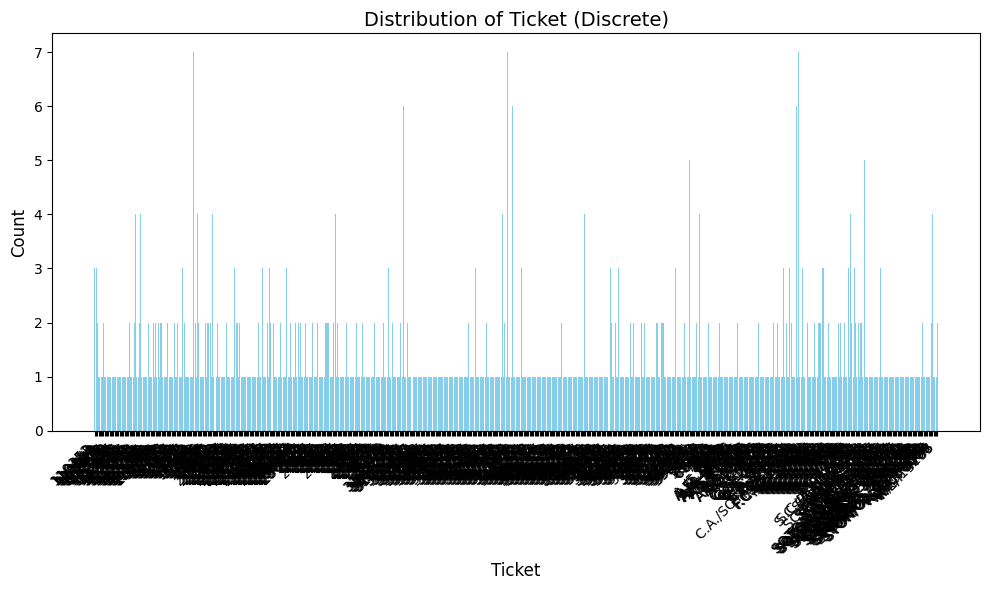

In [216]:
visualize_distribution(
    train_df,
    'Ticket',
    True
)

In [217]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

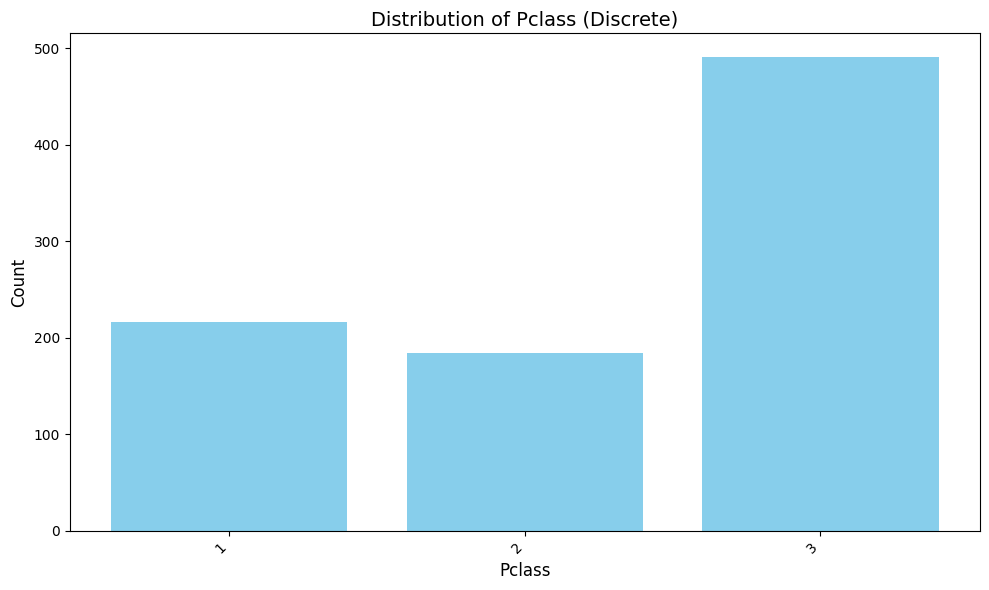

In [218]:
visualize_distribution(
    train_df,
    'Pclass',
    True
)

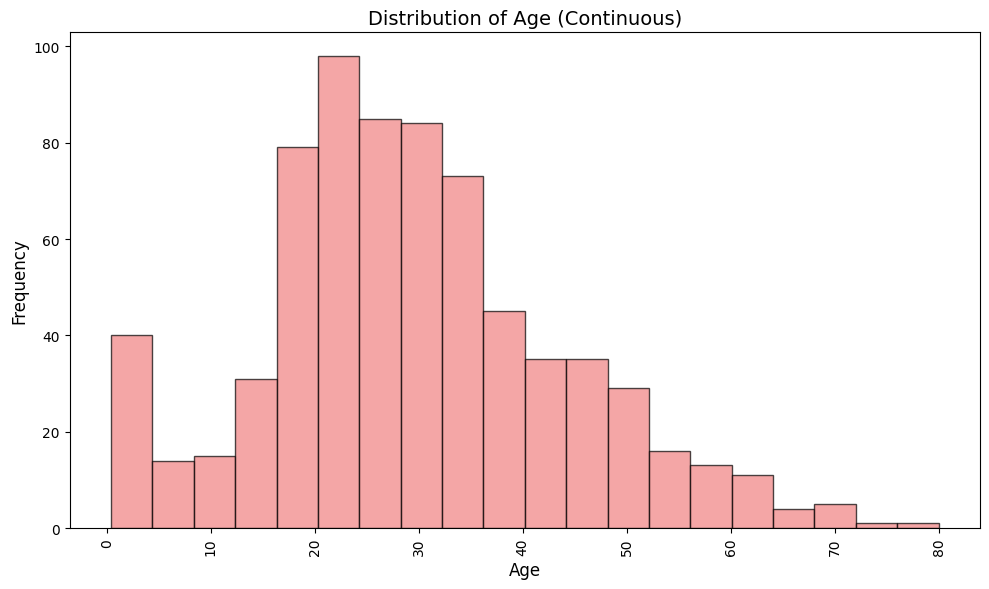

In [219]:
visualize_distribution(
    train_df,
    'Age',
    False
)

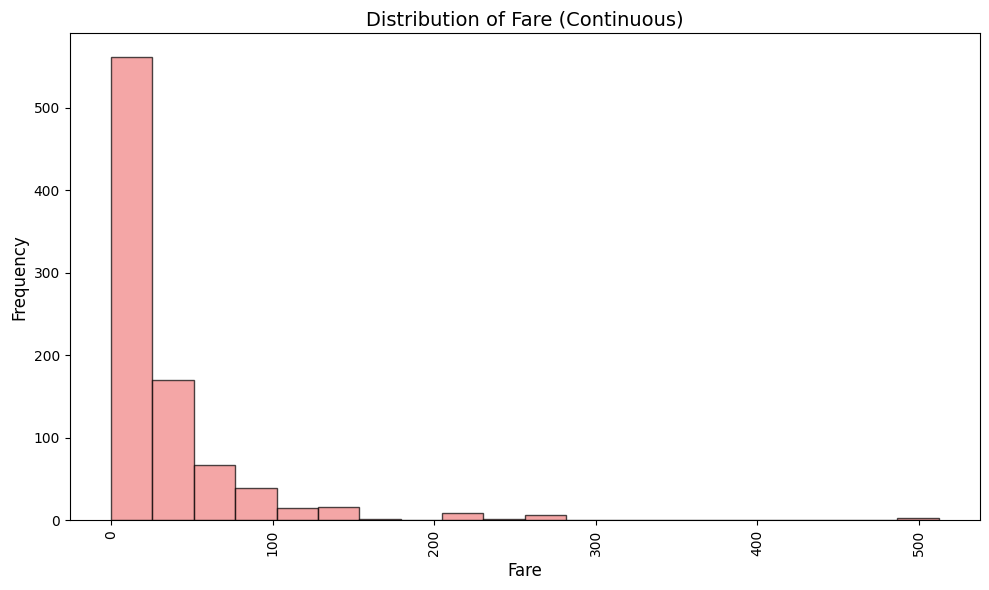

In [220]:
visualize_distribution(
    train_df,
    'Fare',
    False
)

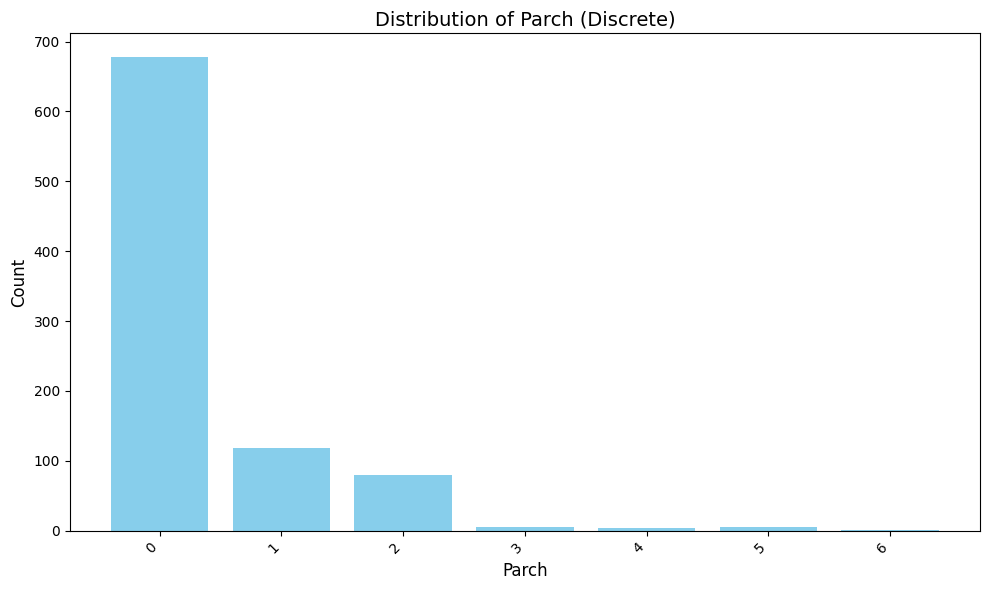

In [221]:
visualize_distribution(
    train_df,
    'Parch',
    True
)

In [222]:
print(
    set(train_df.columns)
)

{'Cabin', 'SibSp', 'Sex', 'Embarked', 'Survived', 'Ticket', 'Name', 'Pclass', 'Age', 'Fare', 'PassengerId', 'Parch'}


## 2.2. Extract Codebook

In [223]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [224]:
def extract_codebook(
    df: pd.DataFrame
) -> pd.DataFrame:
    columns = df.columns
    print(columns)
    descriptions = [
        'Unique identifier for each passenger.',
        'The Target Variable. (0 = Did not survive, 1 = Survived).',
        'Ticket class (1, 2, 3).',
        'Name of the passenger.',
        'Passenger\'s gender (1, 0)',
        'Age of the passenger',
        'The number of sisters/brothers or/and wife/husband.',
        'The number of mother/father and sons/daughters.',
        'The number of tickets',
        'The price of ticket',
        'Cabin ID',
        'Port of Embarkation (S, C, Q)'
    ]
    return pd.DataFrame({
        'name': columns,
        'description': descriptions
    })

In [225]:
extract_codebook(train_df)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,name,description
0,PassengerId,Unique identifier for each passenger.
1,Survived,"The Target Variable. (0 = Did not survive, 1 =..."
2,Pclass,"Ticket class (1, 2, 3)."
3,Name,Name of the passenger.
4,Sex,"Passenger's gender (1, 0)"
5,Age,Age of the passenger
6,SibSp,The number of sisters/brothers or/and wife/hus...
7,Parch,The number of mother/father and sons/daughters.
8,Ticket,The number of tickets
9,Fare,The price of ticket


# 3. Feature engineering

## 3.1. Create new features

In [226]:
def engineer_ticket_features(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    ticket_counts = df['Ticket'].value_counts()
    df['Group_Size'] = df['Ticket'].map(ticket_counts)

    df['Is_Solo'] = (df['Group_Size'] == 1).astype(int)

    df = df.drop(columns=['Ticket']) 
    
    return df

In [227]:
engineer_ticket_features(
    train_df
)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Group_Size,Is_Solo
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S,2,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,1,1


In [228]:
def engineer_family_size(
    df: pd.DataFrame
) -> pd.DataFrame:
    df = df.copy()

    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
    df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)
    df = df.drop(columns = ['SibSp', 'Parch'])

    return df

In [229]:
engineer_family_size(
    train_df
)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_Size,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,111369,30.0000,C148,C,1,1


In [230]:
def engineer_feature(
    df: pd.DataFrame
) -> pd.DataFrame:

    result_df = df.copy()
    result_df = engineer_ticket_features(result_df)
    result_df = engineer_family_size(result_df)

    result_df = result_df.drop(columns = ['PassengerId', 'Name'])
    return result_df

In [231]:
engineer_feature(train_df)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Group_Size,Is_Solo,Family_Size,Is_Alone
0,0,3,male,22.0,7.2500,NaN,S,1,1,2,0
1,1,1,female,38.0,71.2833,C85,C,1,1,2,0
2,1,3,female,26.0,7.9250,NaN,S,1,1,1,1
3,1,1,female,35.0,53.1000,C123,S,2,0,2,0
4,0,3,male,35.0,8.0500,NaN,S,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,NaN,S,1,1,1,1
887,1,1,female,19.0,30.0000,B42,S,1,1,1,1
888,0,3,female,NaN,23.4500,NaN,S,2,0,4,0
889,1,1,male,26.0,30.0000,C148,C,1,1,1,1


## 3.2. Cross-variable analysis

In [232]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency, f_oneway, pointbiserialr
from sklearn.preprocessing import LabelEncoder


In [233]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    if min(r_corr, k_corr) == 0:
        return np.nan
        
    v = np.sqrt(phi2_corr / min(k_corr, r_corr))
    return v

In [234]:
def calculate_correlation_matrix(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Tính ma trận mối quan hệ tổng hợp và ma trận p-value tương ứng.

    Lưu ý: DataFrame phải được điền NaN, và biến phân loại phải ở dạng 'object' hoặc 'category'.
    """
    df = df.copy().dropna() # Bỏ qua các hàng có NaN để đơn giản hóa phép tính thống kê
    all_cols = df.columns.tolist()
    
    # Phân loại cột
    numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Khởi tạo ma trận
    Corr_matrix = pd.DataFrame(index=all_cols, columns=all_cols, dtype=float)
    P_matrix = pd.DataFrame(index=all_cols, columns=all_cols, dtype=float)
    
    # --- Lặp và Tính toán ---
    for col1 in all_cols:
        for col2 in all_cols:
            
            if col1 == col2:
                Corr_matrix.loc[col1, col2] = 1.0
                P_matrix.loc[col1, col2] = 0.0
                continue
            
            is_num1 = col1 in numerical_cols
            is_num2 = col2 in numerical_cols

            # 1. Số - Số (Pearson R)
            if is_num1 and is_num2:
                r, p = pearsonr(df[col1], df[col2])
                Corr_matrix.loc[col1, col2] = r
                P_matrix.loc[col1, col2] = p
            
            # 2. Chữ - Chữ (Cramér's V và Chi-square P-value)
            elif not is_num1 and not is_num2:
                # Mối quan hệ: Cramér's V
                v = cramers_v(df[col1], df[col2])
                Corr_matrix.loc[col1, col2] = v
                
                # P-value: Kiểm định Chi-square
                chi2, p, _, _ = chi2_contingency(pd.crosstab(df[col1], df[col2]))
                P_matrix.loc[col1, col2] = p
            
            # 3. Số - Chữ (Numeric - Categorical)
            elif is_num1 != is_num2:
                num_col = col1 if is_num1 else col2
                cat_col = col2 if is_num1 else col1
                
                groups = [group for name, group in df.groupby(cat_col)[num_col]]
                
                if len(groups) > 1:
                    # Mối quan hệ: Tương quan R Point-Biserial (nếu biến phân loại là nhị phân)
                    # Hoặc R Point-Biserial (nếu biến phân loại là nhị phân)
                    
                    # *Sử dụng ANOVA (Phân tích phương sai) để đo lường mức độ phụ thuộc và P-value*
                    # ANOVA đo lường sự khác biệt về giá trị trung bình của biến số giữa các nhóm phân loại
                    
                    try:
                        f_stat, p_val = f_oneway(*groups) # *groups truyền các mảng vào f_oneway
                        
                        # Chỉ số mối quan hệ: Sử dụng Eta-squared hoặc Point-Biserial
                        # Ở đây chúng ta tạm dùng p-value của ANOVA làm thước đo chính.
                        P_matrix.loc[col1, col2] = p_val
                        P_matrix.loc[col2, col1] = p_val
                        
                        # Chỉ số mối quan hệ (R): Tạm thời để NaN hoặc tính Eta-Squared
                        Corr_matrix.loc[col1, col2] = np.nan 
                        Corr_matrix.loc[col2, col1] = np.nan 

                    except ValueError: # Xảy ra nếu một nhóm chỉ có 1 quan sát, v.v.
                        Corr_matrix.loc[col1, col2] = np.nan
                        P_matrix.loc[col1, col2] = np.nan
                        
    return Corr_matrix

In [235]:
cor_matrix= calculate_correlation_matrix(
    engineer_feature(train_df)
)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_correlation_heatmap(
    R_matrix: pd.DataFrame,
    title_prefix: str = "Hybrid Correlation Analysis"
):

    fig, ax = plt.subplots(1, 1, figsize=(10, 9))
    
    mask = np.triu(R_matrix) 
    
    sns.heatmap(
        R_matrix, 
        mask=mask,
        annot=True, 
        fmt=".2f",
        cmap='coolwarm',
        linewidths=.5,
        cbar_kws={'label': 'Correlation/Effect Size'},
        ax=ax
    )
    
    ax.set_title(f'{title_prefix}\n(Correlation/Effect Size)')
    ax.tick_params(axis='x', rotation=45) 
    ax.tick_params(axis='y', rotation=0) 

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


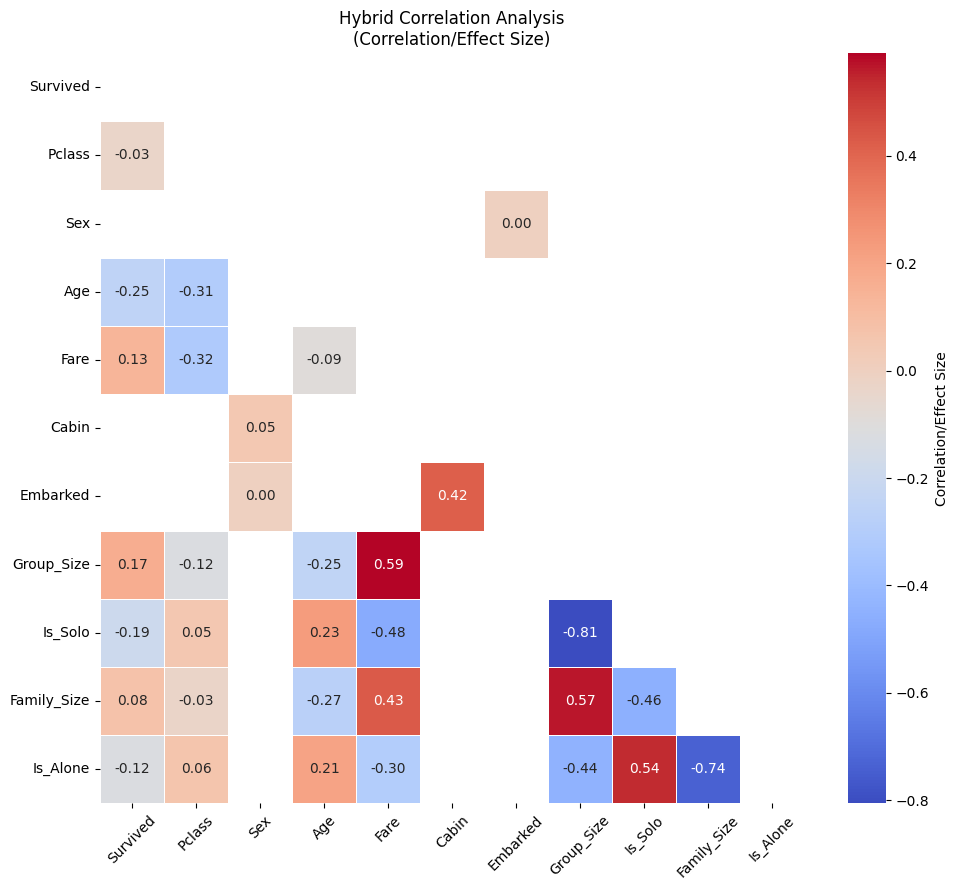

In [237]:
plot_correlation_heatmap(cor_matrix)

-> Drop Group_size and Family_size

In [238]:
def engineer_feature2(
    df: pd.DataFrame
) -> pd.DataFrame:
    df = df.copy()
    df = df.drop(
        columns = ['Group_Size', 'Family_Size', 'Cabin']
    )
    return df
    

In [239]:
def engineer_feature_full(
    df
):
    df = df.copy()

    df = engineer_feature(df)
    df = engineer_feature2(df)

    sex_mapping = {'male': 1, 'female': 0}
    df['Sex'] = df['Sex'].map(sex_mapping).astype(int)
    
    df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked', drop_first=True)
    df = df.drop(columns=['PassengerId', 'Name', 'Cabin'], errors='ignore')

    return df
    

In [240]:
engineer_feature_full(
    train_df
)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Sex,Age,Fare,Is_Solo,Is_Alone,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,1,0,False,True
1,1,1,0,38.0,71.2833,1,0,False,False
2,1,3,0,26.0,7.9250,1,1,False,True
3,1,1,0,35.0,53.1000,0,0,False,True
4,0,3,1,35.0,8.0500,1,1,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1,1,False,True
887,1,1,0,19.0,30.0000,1,1,False,True
888,0,3,0,NaN,23.4500,0,0,False,True
889,1,1,1,26.0,30.0000,1,1,False,False


In [241]:
extract_general_description(
    engineer_feature_full(
        train_df
    )
)

----------- GENERAL DESCRIPTION -----------
Number of columns: 9
Number of samples: 891
Types of datatype: {dtype('float64'), dtype('bool'), dtype('int64')}


,names,datatype,number_of_null_value,null_rate,number_of_distinct_value
Survived,Survived,int64,0,0.00000,2
Pclass,Pclass,int64,0,0.00000,3
Sex,Sex,int64,0,0.00000,2
Age,Age,float64,177,19.86532,88
Fare,Fare,float64,0,0.00000,248
Is_Solo,Is_Solo,int64,0,0.00000,2
Is_Alone,Is_Alone,int64,0,0.00000,2
Embarked_Q,Embarked_Q,bool,0,0.00000,2
Embarked_S,Embarked_S,bool,0,0.00000,2


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


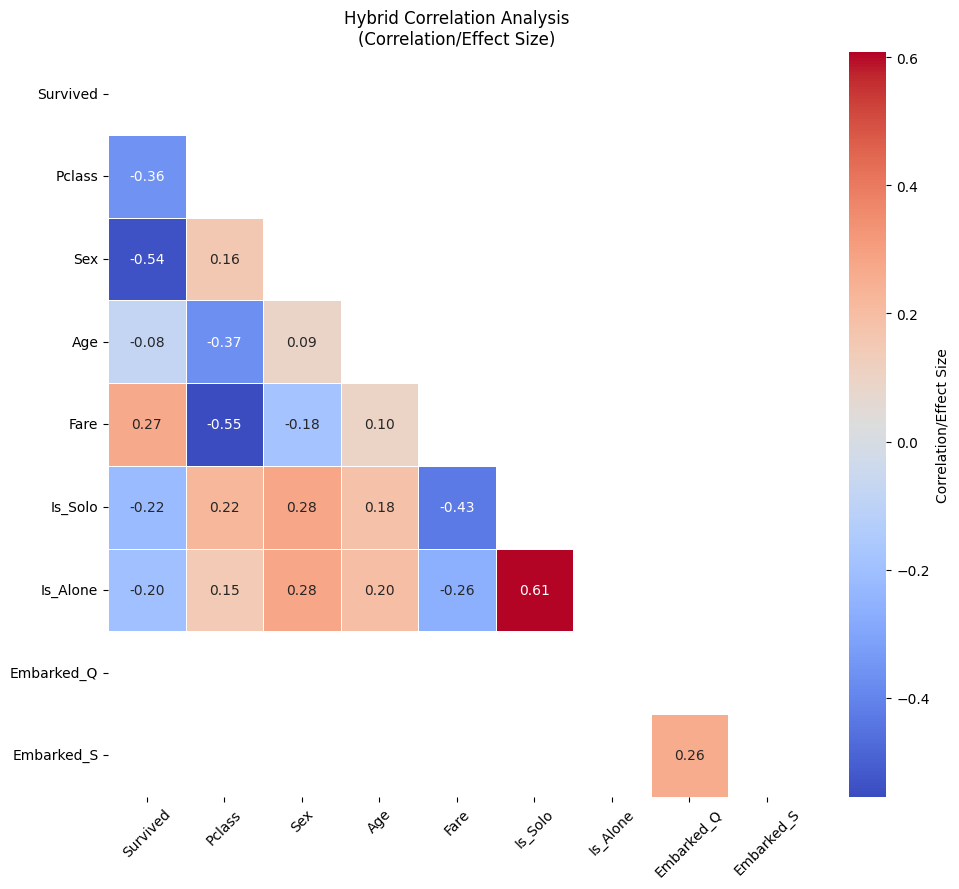

In [242]:
plot_correlation_heatmap(
    calculate_correlation_matrix(
        engineer_feature_full(
            train_df
        )
    )
)

## 3.3. Handling missing values

In [245]:
def impute_missing_values(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    
    age_median = df['Age'].median()
    df['Age'].fillna(age_median, inplace=True)
    
    print(f"Kiểm tra NaN sau Imputation:\n{df[['Age']].isnull().sum()}")

    

    return df

In [246]:
train = impute_missing_values(
    engineer_feature_full(
        train_df
    )
)

Kiểm tra NaN sau Imputation:
Age    0
dtype: int64


/tmp/ipykernel_47/3970303861.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median, inplace=True)


In [247]:
train

,Survived,Pclass,Sex,Age,Fare,Is_Solo,Is_Alone,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,1,0,False,True
1,1,1,0,38.0,71.2833,1,0,False,False
2,1,3,0,26.0,7.9250,1,1,False,True
3,1,1,0,35.0,53.1000,0,0,False,True
4,0,3,1,35.0,8.0500,1,1,False,True
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,1,1,False,True
887,1,1,0,19.0,30.0000,1,1,False,True
888,0,3,0,28.0,23.4500,0,0,False,True
889,1,1,1,26.0,30.0000,1,1,False,False


# 4. Apply XGBoost

In [248]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [249]:
def run_xgboost_model(
    df_processed: pd.DataFrame, 
    target_col: str = 'Survived'
):

    X = df_processed.drop(columns=[target_col], errors='ignore')
    Y = df_processed[target_col]
    
    X = X.select_dtypes(include=np.number)

    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42
    )

    print("--- Khởi tạo và Huấn luyện XGBoost ---")
    
    model = XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    
    print(f"✅ Huấn luyện hoàn tất.")
    print(classification_report(Y_test, Y_pred))
    print(f"Độ chính xác (Accuracy) trên tập kiểm tra: {accuracy:.4f}")
    
    return model

In [250]:
model = run_xgboost_model(train)

--- Khởi tạo và Huấn luyện XGBoost ---
✅ Huấn luyện hoàn tất.
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Độ chính xác (Accuracy) trên tập kiểm tra: 0.7989


# 5. Predict

In [253]:
test = pd.read_csv(TEST_PATH)
test

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [255]:
testing_id = test['PassengerId']
testing_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [260]:
testing_df = engineer_feature_full(test)
testing_df['PassengerId'] = testing_id

In [261]:
testing_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Pclass,Sex,Age,Fare,Is_Solo,Is_Alone,Embarked_Q,Embarked_S,PassengerId
0,3,1,34.5,7.8292,1,1,True,False,892
1,3,0,47.0,7.0000,1,0,False,True,893
2,2,1,62.0,9.6875,1,1,True,False,894
3,3,1,27.0,8.6625,1,1,False,True,895
4,3,0,22.0,12.2875,1,0,False,True,896
...,...,...,...,...,...,...,...,...,...
413,3,1,NaN,8.0500,1,1,False,True,1305
414,1,0,39.0,108.9000,1,1,False,False,1306
415,3,1,38.5,7.2500,1,1,False,True,1307
416,3,1,NaN,8.0500,1,1,False,True,1308


In [263]:
def generate_submission_file(model: XGBClassifier, testing_df: pd.DataFrame) -> pd.DataFrame:
    passenger_ids = testing_df['PassengerId']
    columns_to_drop = ['PassengerId', 'Name', 'Cabin'] 
    X_test_final = testing_df.drop(columns=columns_to_drop, errors='ignore')
    X_test_final = X_test_final.select_dtypes(include=np.number)

    print("--- Đang tiến hành Dự đoán trên tập kiểm tra... ---")
    predictions = model.predict(X_test_final)
    submission_df = pd.DataFrame({
        'PassengerId': passenger_ids,
        'Survived': predictions
    })
    
    submission_df['Survived'] = submission_df['Survived'].astype(int)
    
    print("✅ Dự đoán hoàn tất. DataFrame kết quả đã được tạo.")
    print("Kích thước DataFrame: ", submission_df.shape)
    
    return submission_df

In [265]:
submition = generate_submission_file(
    model,
    testing_df
)

--- Đang tiến hành Dự đoán trên tập kiểm tra... ---
✅ Dự đoán hoàn tất. DataFrame kết quả đã được tạo.
Kích thước DataFrame:  (418, 2)


In [267]:
submition

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [269]:
submition.to_csv('submition1.csv', index = False)